<a href="https://colab.research.google.com/github/albicilla/-/blob/master/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

Pythonだと引数は参照渡しだが、イミュータブルである。
引数を更新しようとすると新しいオブジェクトが作成されてポインタのような使い方はできない。
しょうがないので辞書(key-value)を使って似たようなことをした。全体的に非常に頭が悪い実装。

In [0]:
# ユークリッド距離を求める関数
def euc_dist(a, b):
    assert len(a) == len(b)
    return np.linalg.norm(a - b)

In [0]:
# 点から距離epsilonの範囲に存在する点のリストを返す関数
# 自身を含む
def region_query(i, points, epsilon):
    neighbor_points = []
    for j, point in points.items():
        if euc_dist(points[i], point) <= epsilon:
            neighbor_points.append(j)
    return neighbor_points

In [0]:
# クラスターを拡大していく関数
# TrueまたはFalseを返す
# seedsは境界領域の点のリスト
# seedから周辺の点をたどる。その点の周辺min_points以上存在するようならseedはcore_clusterとなる。
# core_clusterから到達可能な点をseedsとして追加し、新たにcore_clusterの候補とする。
# これをcore_clusterの候補がなくなるまで繰り返す。

def expand_cluster(i, cluster_id, points, epsilon, min_points):
    seeds = region_query(i, points, epsilon)
    
    if len(seeds) < min_points:
        change_cluster_ids(seeds, -1)
        return False
    else:
        change_cluster_ids(seeds, cluster_id)
        #     リストのremoveを使うのはO(n)なので頭悪い
        seeds.remove(i)
      
        while len(seeds) > 0:
            current_point = seeds[0]
            result = region_query(current_point, points, epsilon)

            if len(result) >= min_points:
                for j in result:
                    if labels[j] == None or labels[j] == -1:
                        if labels[j] == None:
                            seeds.append(j)
                        labels[j] = cluster_id
            seeds.remove(current_point)
        
    return True

In [0]:
# 点のクラスターidをまとめて変更する関数
def change_cluster_ids(seeds, cluster_id):
    for j in seeds:
        labels[j] = cluster_id

In [0]:
def dbscan(points, epsilon=0.5, min_points=5):
    
#     global変数にするとメモリ使用量を減らせるが頭悪い気がする
    global labels
    labels = np.full(len(points), None)
    cluster_id = 0
#     ポインタが使えないので辞書を使うことでidを振る
    points = {i: p for i, p in enumerate(points)}


    for i in points.keys():
        if labels[i] == None: 
            if expand_cluster(i, cluster_id, points, epsilon, min_points):
                cluster_id += 1

    return np.array(labels)

In [0]:
# データの読み込み
# 要アップロード
with open ('dbscan_test.txt', 'r') as f:
    data = np.array([[float(l.split()[1]), float(l.split()[2])] for l in f.readlines()])

In [0]:
# 念の為データをシャッフル
np.random.shuffle(data)

In [0]:
# クラスタリングの実行
labels = dbscan(data, epsilon=4, min_points=6)

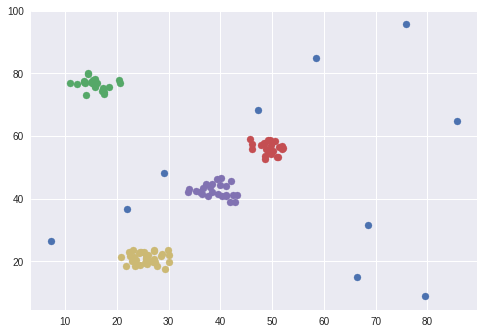

In [0]:
# クラスタリング結果のプロット
plt.scatter(data[:, 0][np.where(labels==-1)], data[:, 1][np.where(labels==-1)])

for i in range(np.argmax(labels)):
    plt.scatter(data[:, 0][np.where(labels==i)], data[:, 1][np.where(labels==i)])

In [0]:
labels

array([0, 1, 1, 2, 0, 0, 3, 0, 0, 2, 2, 3, 3, 2, 2, 0, 2, -1, 2, 2, 0, 2,
       3, 1, 1, -1, 2, 3, -1, 3, 3, 0, 1, 2, 3, 3, 3, 3, 3, 2, 1, 1, 3, 1,
       3, -1, 2, 1, 1, 3, -1, 0, 0, 1, 0, 0, 3, 1, 1, 2, 3, 1, -1, -1, 2,
       2, 0, 2, 3, 2, 0, 0, 2, 1, 3, 3, 1, 1, 3, 1, 2, 2, -1, -1, 3, 0, 0,
       0, 1, 3, 2, 2, 1, 0, 3, 3, 1, 1, 0, 0, 3, 3, -1, 3, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 3, 3, 3, 0], dtype=object)